In [1]:
# setup absolute path to location of package Starts and config-file 
from inspect import getsourcefile
import os.path as path, sys
current_dir = path.dirname(path.abspath(getsourcefile(lambda:0)))
sys.path.insert(0, current_dir[:current_dir.rfind(path.sep)])

# import package Starts
from Starts.startml import *
from Starts.startvis import *
%matplotlib inline

local_kwargs {'data_path': './data/data1.csv, ./data/data2.json', 'drop_obj_col': False, 'nan_drop_col': False, 'nan_drop_row': False, 'nan_zero': False, 'nan_mean': True, 'nan_mean_neighbors': False}


In [2]:
train_data = idata[0]
nonan_data = idata[1]
print(train_data['overdue'].mean(), np.mean(train_data['overdue'].values))
print(train_data['sla'].median(), np.median(train_data['sla'].values), len(train_data))
print(np.unique(train_data['type'].values), len(train_data[train_data['type']==2])/ len(train_data))

-4.798978000000018 -4.798978
14.0 14.0 25000
[ 0.  1.  2.  3.  4.  5.] 0.05284


In [3]:
train_data.columns, nonan_data.columns

(Index(['id', 'sla', 'overdue', 'x', 'y', 'type'], dtype='object'),
 Index(['created', 'district', 'id', 'id2', 'key'], dtype='object'))

In [4]:
nonan_data.head()

,created,district,id,id2,key
0,1357571830000,C,101000879701,1231880010005,492U
1,1380367716000,F,11682872-101001143202,1181610010014,488Z
2,1376290781000,J,101001090815,0834050000002,530H
3,1358517113000,F,11594791-101000891316,1095590000010,528G
4,1368462905000,F,101001002655,1138180000022,528C


In [5]:
train_data.head()

,id,sla,overdue,x,y,type
0,101000879701,10.0,-8.98,3105443.57,13832598.28,3.0
1,11682872-101001143202,14.0,-7.79,3047695.62,13826869.96,3.0
2,101001090815,10.0,-8.59,3078170.34,13820368.28,3.0
3,11594791-101000891316,15.0,-14.89,3041615.31,13820936.90,3.0
4,101001002655,4.0,4.57,3041051.24,13824386.21,3.0


In [6]:
arundo = nonan_data.merge(train_data, how='left', on=['id'])

In [7]:
arundo.head()

,created,district,id,id2,key,sla,overdue,x,y,type
0,1357571830000,C,101000879701,1231880010005,492U,10.0,-8.98,3105443.57,13832598.28,3.0
1,1380367716000,F,11682872-101001143202,1181610010014,488Z,14.0,-7.79,3047695.62,13826869.96,3.0
2,1376290781000,J,101001090815,0834050000002,530H,10.0,-8.59,3078170.34,13820368.28,3.0
3,1358517113000,F,11594791-101000891316,1095590000010,528G,15.0,-14.89,3041615.31,13820936.90,3.0
4,1368462905000,F,101001002655,1138180000022,528C,4.0,4.57,3041051.24,13824386.21,3.0


In [8]:
nonan_data = StartML.convert_time_series(nonan_data, time_column='created', format=None)
nonan_data.head()

,district,id,id2,key
created,,,,
2013-01-01 08:26:29,C,101000874001,0690420070016,492F
2013-01-01 09:03:21,I,11587257-101000874009,0731430060005,494Y
2013-01-01 10:00:58,B,101000874025,0931670000537,375J
2013-01-01 10:24:31,D,11587271-101000874033,1220790000001,573D
2013-01-01 10:59:03,A,101000874044,0772810070057,450U


In [9]:
# nonan_data['created'] = pd.to_datetime(nonan_data['created'], unit='ms')
# nonan_data = nonan_data.set_index('created')
# nonan_data = nonan_data.sort_index()

print(len(nonan_data['2013-03-04':'2013-03-10']))
print(len(nonan_data['2013-07-15':'2013-07-21']))
print(len(nonan_data['2013-09-02':'2013-09-08']))
print(len(nonan_data['2013-08-12':'2013-08-18']))

509
526
506
623


In [10]:
print(len(train_data.columns), len(nonan_data.columns), len(train_data), len(nonan_data))

6 4 25000 25000


In [11]:
train_data.head()

,id,sla,overdue,x,y,type
0,101000879701,10.0,-8.98,3105443.57,13832598.28,3.0
1,11682872-101001143202,14.0,-7.79,3047695.62,13826869.96,3.0
2,101001090815,10.0,-8.59,3078170.34,13820368.28,3.0
3,11594791-101000891316,15.0,-14.89,3041615.31,13820936.90,3.0
4,101001002655,4.0,4.57,3041051.24,13824386.21,3.0


In [12]:
nonan_data.head()

,district,id,id2,key
created,,,,
2013-01-01 08:26:29,C,101000874001,0690420070016,492F
2013-01-01 09:03:21,I,11587257-101000874009,0731430060005,494Y
2013-01-01 10:00:58,B,101000874025,0931670000537,375J
2013-01-01 10:24:31,D,11587271-101000874033,1220790000001,573D
2013-01-01 10:59:03,A,101000874044,0772810070057,450U


In [13]:
StartML.convert_time_series(arundo, 'created', format=False, add_day=True)
# arundo['day'] = [t.weekday() for t in arundo.index]    
# arundo['created'] = pd.to_datetime(arundo['created'], unit='ms')
# arundo = arundo.set_index('created')
# arundo = arundo.sort_index()

,district,id,id2,key,sla,overdue,x,y,type,day
created,,,,,,,,,,
2013-01-01 08:26:29,C,101000874001,0690420070016,492F,4.0,-0.94,3.102842e+06,1.384451e+07,3.0,1
2013-01-01 09:03:21,I,11587257-101000874009,0731430060005,494Y,40.0,-22.86,3.137161e+06,1.383132e+07,3.0,1
2013-01-01 10:00:58,B,101000874025,0931670000537,375J,4.0,-2.75,3.140737e+06,1.391515e+07,3.0,1
2013-01-01 10:24:31,D,11587271-101000874033,1220790000001,573D,15.0,-14.83,3.126822e+06,1.380293e+07,3.0,1
2013-01-01 10:59:03,A,101000874044,0772810070057,450U,7.0,-3.90,3.072150e+06,1.385688e+07,3.0,1
2013-01-01 11:10:13,I,11587279-101000874048,0600090000024,574D,2.0,-1.75,3.144257e+06,1.380631e+07,3.0,1
2013-01-01 12:50:42,D,101000874075,0772790280020,575P,4.0,-2.88,3.151412e+06,1.379147e+07,3.0,1
2013-01-01 13:09:30,J,11587299-101000874085,1025860000002,491S,1.0,-0.86,3.080827e+06,1.383203e+07,3.0,1
2013-01-01 13:23:06,H,101000874088,0311270000010,453V,11.0,-6.28,3.124741e+06,1.385744e+07,3.0,1


In [14]:
arundo.index

DatetimeIndex(['2013-01-07 15:17:10', '2013-09-28 11:28:36',
               '2013-08-12 06:59:41', '2013-01-18 13:51:53',
               '2013-05-13 16:35:05', '2013-04-22 13:22:48',
               '2013-02-08 13:16:15', '2013-09-20 16:26:37',
               '2013-05-24 10:41:58', '2013-06-11 09:59:40',
               ...
               '2013-06-24 11:28:10', '2013-03-05 12:31:26',
               '2013-04-24 15:57:09', '2013-10-23 09:18:09',
               '2013-09-13 02:47:02', '2013-06-21 14:28:00',
               '2013-02-15 15:31:39', '2013-06-27 17:47:59',
               '2013-09-27 14:13:14', '2013-09-03 17:46:00'],
              dtype='datetime64[ns]', name='created', length=25000, freq=None)

In [15]:
arundo['2013-02']

,district,id,id2,key,sla,overdue,x,y,type,day
created,,,,,,,,,,
2013-02-08 13:16:15,K,101000912594,1043280000076,530Z,7.0,-3.66,3.079573e+06,1.380517e+07,3.0,4
2013-02-06 14:58:32,F,11602994-101000910576,1144570140004,488Y,2.0,-1.13,3.043938e+06,1.382928e+07,3.0,2
2013-02-11 13:35:13,A,11604497-101000914383,0952670000024,450S,14.0,-13.12,3.064984e+06,1.385475e+07,3.0,0
2013-02-15 16:01:01,I,11606216-101000918865,0600160270003,574G,2.0,-1.07,3.139963e+06,1.380219e+07,3.0,4
2013-02-08 10:11:02,C,5961-101000912249,0370710000006,493N,1.0,-2.98,3.114171e+06,1.383801e+07,2.0,4
2013-02-20 13:09:52,F,11607801-101000923010,1093980000029,529B,40.0,-38.88,3.053502e+06,1.382318e+07,3.0,2
2013-02-28 12:21:12,B,7178-101000930949,0813560000540,495L,1.0,-2.76,3.151790e+06,1.384268e+07,2.0,3
2013-02-08 17:32:08,J,11603872-101000912991,0924070000002,530Q,10.0,-3.14,3.074120e+06,1.381419e+07,3.0,4
2013-02-15 09:41:18,I,11605948-101000918248,0591810040012,535V,1.0,-0.83,3.156081e+06,1.381374e+07,3.0,4


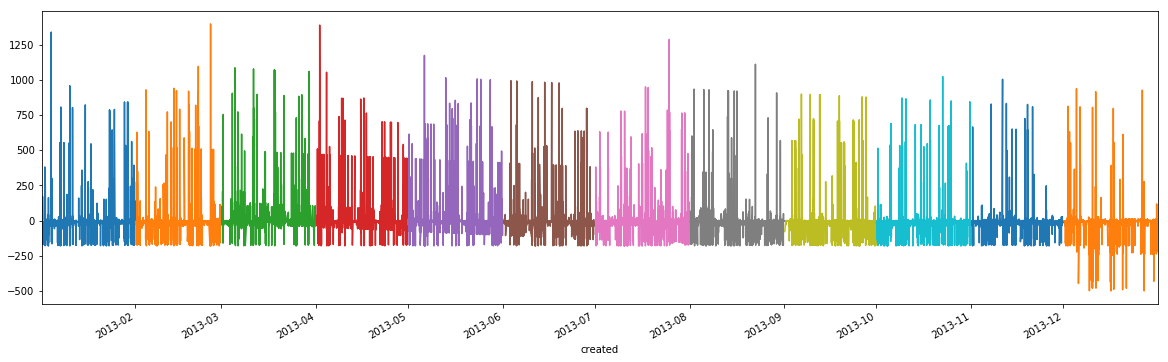

In [16]:
plt.figure(figsize=(20, 6))
arundo['2013-01']['overdue'].plot()
arundo['2013-02']['overdue'].plot()
arundo['2013-03']['overdue'].plot()
arundo['2013-04']['overdue'].plot()
arundo['2013-05']['overdue'].plot()
arundo['2013-06']['overdue'].plot()
arundo['2013-07']['overdue'].plot()
arundo['2013-08']['overdue'].plot()
arundo['2013-09']['overdue'].plot()
arundo['2013-10']['overdue'].plot()
arundo['2013-11']['overdue'].plot()
arundo['2013-12']['overdue'].plot()

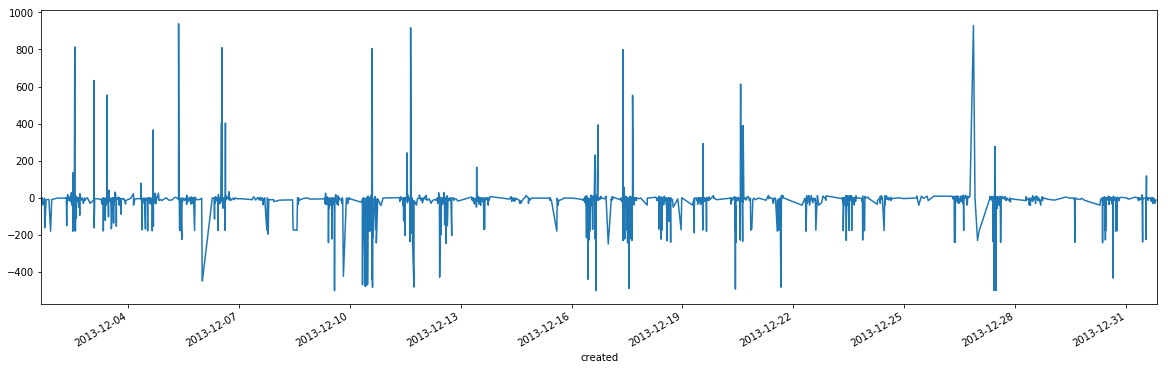

In [17]:
# '2013-03-04':'2013-03-10'
plt.figure(figsize=(20, 6))
arundo['2013-12-01':'2013-12-31']['overdue'].plot()

In [18]:
arundo['2013-12-01':'2013-12-31']['overdue']

created
2013-12-17 09:50:41     -9.80
2013-12-13 09:10:56    -13.57
2013-12-10 12:53:29   -179.99
2013-12-04 01:30:43     -4.36
2013-12-17 10:48:46     -1.83
2013-12-17 02:43:26      4.41
2013-12-10 11:22:25     -4.16
2013-12-30 15:09:43    -34.18
2013-12-12 00:47:41      0.36
2013-12-27 13:56:02    -39.19
2013-12-03 17:33:56      0.63
2013-12-10 08:21:05    -19.84
2013-12-17 11:39:11     -1.99
2013-12-12 16:10:57    -13.28
2013-12-10 17:05:06     -6.08
2013-12-10 07:38:12    -23.91
2013-12-09 17:02:23     -7.07
2013-12-31 13:04:47    -18.15
2013-12-12 18:10:56   -203.75
2013-12-17 10:23:25    -28.14
2013-12-07 13:00:02     -2.80
2013-12-19 09:55:08    -34.85
2013-12-09 16:18:52     -6.30
2013-12-06 13:37:23    -56.07
2013-12-27 10:38:43     -5.98
2013-12-18 13:08:30    -13.00
2013-12-31 02:27:53     -5.89
2013-12-05 15:52:56     -8.20
2013-12-14 17:37:52     -0.13
2013-12-30 12:45:42     -7.91
                        ...  
2013-12-26 09:47:50     -0.85
2013-12-18 17:27:50    -13.05
20

In [19]:
min(arundo['2013-12-01':'2013-12-31']['overdue'])

-501.04000000000002

In [20]:
StartML.lookup_value(arundo, -501.04)

array([[Timestamp('2013-12-16 15:43:26'), 'overdue']], dtype=object)

In [21]:
min(arundo['2013-12-16']['overdue'])

-501.04000000000002

In [22]:
StartML.groupby_columns(arundo, columns=['overdue'], groupby_label=['day'], func=None)

{0: DatetimeIndex(['2013-01-07 15:17:10', '2013-08-12 06:59:41',
                '2013-05-13 16:35:05', '2013-04-22 13:22:48',
                '2013-01-14 14:54:26', '2013-11-25 14:19:31',
                '2013-06-24 16:14:26', '2013-03-11 16:17:12',
                '2013-05-06 01:41:22', '2013-01-28 09:55:51',
                ...
                '2013-03-11 10:06:02', '2013-12-23 11:22:33',
                '2013-10-07 10:33:26', '2013-08-19 16:54:53',
                '2013-08-26 08:21:41', '2013-06-17 09:58:22',
                '2013-01-07 18:54:54', '2013-11-04 17:16:29',
                '2013-11-11 09:56:37', '2013-06-24 11:28:10'],
               dtype='datetime64[ns]', name='created', length=4921, freq=None),
 1: DatetimeIndex(['2013-06-11 09:59:40', '2013-10-01 15:44:59',
                '2013-06-25 12:45:25', '2013-01-29 16:24:20',
                '2013-12-17 09:50:41', '2013-09-17 11:46:17',
                '2013-09-10 13:21:36', '2013-03-19 10:25:42',
                '2013-05-

In [23]:
arundo.columns

Index(['district', 'id', 'id2', 'key', 'sla', 'overdue', 'x', 'y', 'type',
       'day'],
      dtype='object')

In [24]:
StartML.groupby_columns(arundo, columns=['overdue'], groupby_label=['day'], func=np.mean)

,overdue
day,
0,-4.413410
1,-3.808284
2,-3.825404
3,-1.377711
4,-6.304658
5,-9.960528
6,-13.976185


In [25]:
min(StartML.groupby_columns(arundo, columns=['overdue'], groupby_label=['day'], func=np.mean)['overdue'].values)

-13.976184668989532

In [26]:
len(arundo[arundo['district']=='Unknown']), len(arundo)

(39, 25000)

In [27]:
arundo = arundo.drop(arundo[arundo['district']=='Unknown'].index)

In [28]:
len(arundo)

24961

In [29]:
mean_dat_x = arundo['x'].mean()
mean_dat_y = arundo['y'].mean()
mean_dat_x, mean_dat_y

(3110040.074280234, 13835838.319422677)

In [30]:
arundo.head()
arundo['district'].unique()

array(['C', 'F', 'J', 'K', 'D', 'E', 'B', 'A', 'G', 'I', 'H'], dtype=object)

In [31]:
ad = arundo[['district','x', 'y']]

In [32]:
print(mean_dat_x, abs(mean_dat_x-min(sorted(ad[ad['district']=='D']['x']))), abs(mean_dat_x-max(sorted(ad[ad['district']=='D']['x']))))
print(mean_dat_x, abs(mean_dat_x-min(sorted(ad[ad['district']=='A']['x']))), abs(mean_dat_x-max(sorted(ad[ad['district']=='A']['x']))))
print(mean_dat_x, abs(mean_dat_x-min(sorted(ad[ad['district']=='K']['x']))), abs(mean_dat_x-(max(sorted(ad[ad['district']=='K']['x'])))))
print(mean_dat_x, abs(mean_dat_x-min(sorted(ad[ad['district']=='C']['x']))), abs(mean_dat_x-max(sorted(ad[ad['district']=='C']['x']))))

3110040.074280234 4607.08428023 69643.9757198
3110040.074280234 100411.49428 14134.9842802
3110040.074280234 51364.3842802 4878.96082977
3110040.074280234 31927.1542802 8564.58241977


In [33]:
print(mean_dat_y, abs(mean_dat_y-min(ad[ad['district']=='D']['y'])), abs(mean_dat_y-max(ad[ad['district']=='D']['y'])))
print(mean_dat_y, abs(mean_dat_y-min(ad[ad['district']=='A']['y'])), abs(mean_dat_y-max(ad[ad['district']=='A']['y'])))
print(mean_dat_y, abs(mean_dat_y-min(ad[ad['district']=='K']['y'])), abs(mean_dat_y-max(ad[ad['district']=='K']['y'])))
print(mean_dat_y, abs(mean_dat_y-min(ad[ad['district']=='C']['y'])), abs(mean_dat_y-max(ad[ad['district']=='C']['y'])))

13835838.319422677 58298.0994227 5049.02474732
13835838.319422677 12469.3405773 80865.7505773
13835838.319422677 63718.4084427 14930.6903127
13835838.319422677 29254.6505027 43042.0200973
